In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [8]:
x = [-3, 5, 7]

In [9]:
y = [10, 2, 5]

In [10]:
plt.figure(figsize=(15,3))

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

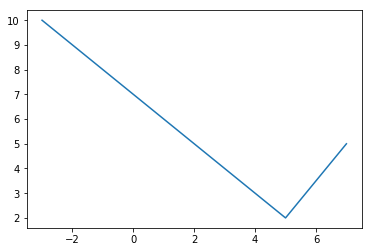

In [11]:
plt.plot(x, y)

(0, 10)

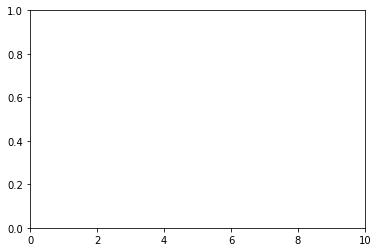

In [12]:
plt.xlim(0, 10)

(-3, 8)

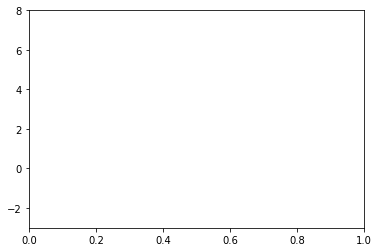

In [13]:
plt.ylim(-3, 8)

Text(0.5, 0, 'X Axis')

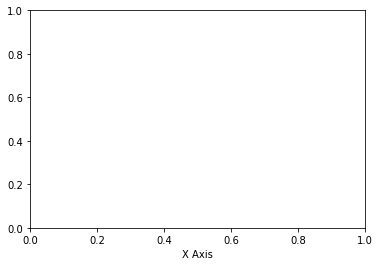

In [14]:
plt.xlabel('X Axis')

Text(0, 0.5, 'Y axis')

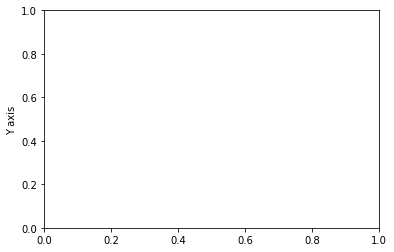

In [15]:
plt.ylabel('Y axis')

Text(0.5, 1.0, 'Line Plot')

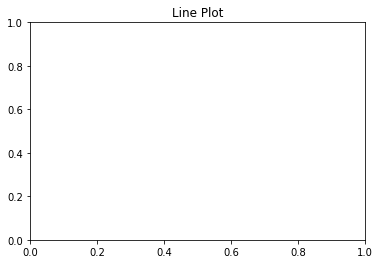

In [16]:
plt.title('Line Plot')

In [17]:
plt.suptitle('Figure Title', size=20, y=1.03)

Text(0.5, 1.03, 'Figure Title')

<Figure size 432x288 with 0 Axes>

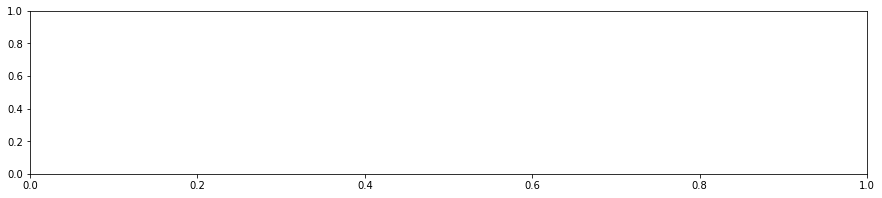

In [18]:
fig, ax = plt.subplots(figsize=(15,3))

In [19]:
ax.plot(x, y)

In [20]:
ax.set_xlim(0, 10)

(0, 10)

In [21]:
ax.set_ylim(-3, 8)

(-3, 8)

In [22]:
ax.set_xlabel('X axis')

Text(0.5, 3.1999999999999993, 'X axis')

In [23]:
ax.set_ylabel('Y axis')

Text(3.200000000000017, 0.5, 'Y axis')

In [24]:
ax.set_title('Line Plot')

Text(0.5, 1.0, 'Line Plot')

In [25]:
fig.suptitle('Figure Title', size=20, y=1.03)

Text(0.5, 1.03, 'Figure Title')

## Visualizing data with matplotlib

In [26]:
movie = pd.read_csv('data/movie.csv')

In [29]:
med_budget = movie.groupby('title_year')['budget'].median()

In [30]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()

In [31]:
med_budget_roll.tail()

title_year
2012.0    20893000.0
2013.0    19893000.0
2014.0    19100000.0
2015.0    17980000.0
2016.0    17780000.0
Name: budget, dtype: float64

In [32]:
years = med_budget_roll.index.values

In [33]:
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [34]:
budget = med_budget_roll.values

In [35]:
budget[-5:]

array([20893000., 19893000., 19100000., 17980000., 17780000.])

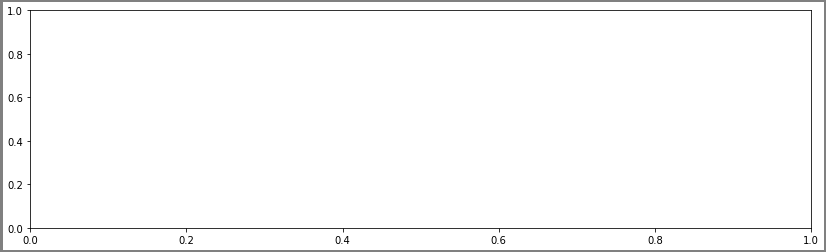

In [36]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')

In [37]:
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')

In [38]:
text_kwargs=dict(fontsize=20, family='cursive')

In [39]:
ax.set_title('Median Movie Budget', **text_kwargs)

Text(0.5, 1.0, 'Median Movie Budget')

In [40]:
ax.set_ylabel('Millions of Dollars', **text_kwargs)

Text(3.200000000000017, 0.5, 'Millions of Dollars')

In [41]:
movie_count = movie.groupby('title_year')['budget'].count()

In [42]:
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [43]:
ct = movie_count.values

In [44]:
ct_norm = ct / ct.max() * budget.max()

In [45]:
fifth_year = (years % 5 == 0) & (years >= 1970)

In [46]:
years_5 = years[fifth_year]

In [47]:
ct_5 = ct[fifth_year]

In [48]:
ct_norm_5 = ct_norm[fifth_year]

In [49]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')

<BarContainer object of 10 artists>

In [50]:
ax.set_xlim(1968, 2017)

(1968, 2017)

In [53]:
for x, y, v in zip(years _5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')

SyntaxError: invalid syntax (<ipython-input-53-c8ea72dce143>, line 1)

In [54]:
ax.legend()

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\matplotlib\font_manager.py:1238: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


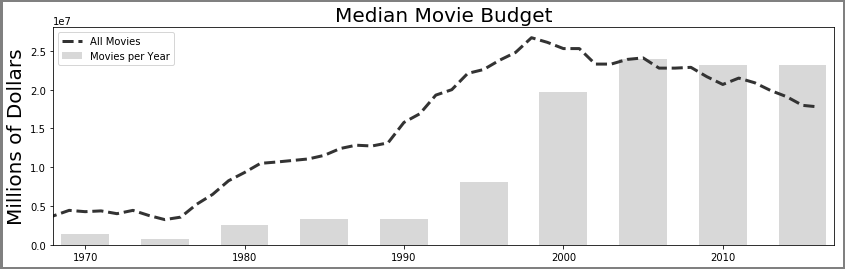

In [55]:
fig

In [57]:
top10 = movie.sort_values('budget', ascending=False) \
 .groupby('title_year')['budget'] \
 .apply(lambda x: x.iloc[:10].median())

In [58]:
top10_roll = top10.rolling(5, min_periods=1).mean()

In [59]:
top10_roll.tail()

title_year
2012.0    192900000.0
2013.0    195900000.0
2014.0    191700000.0
2015.0    186800000.0
2016.0    189100000.0
Name: budget, dtype: float64

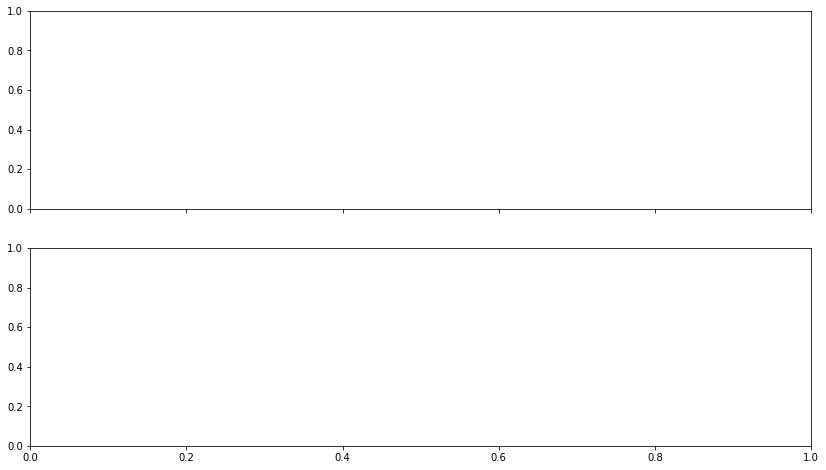

In [60]:
 fig2, ax_array = plt.subplots(2, 1, figsize=(14,8),
sharex=True)

In [61]:
ax1 = ax_array[0]

In [62]:
ax2 = ax_array[1]

In [63]:
ax1.plot(years, budget, linestyle='--', linewidth=3,
 color='.2', label='All Movies')

In [64]:
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5',
 alpha=.3, label='Movies per Year')

<BarContainer object of 10 artists>

In [65]:
ax1.legend(loc='upper left')

In [66]:
ax1.set_xlim(1968, 2017)

(1968, 2017)

In [67]:
plt.setp(ax1.get_xticklines(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [68]:
ax2.plot(years, top10_roll.values, color='.2',
 label='Top 10 Movies')

In [69]:
ax2.legend(loc='upper left')

In [70]:
fig2.tight_layout()

In [71]:
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)

Text(0.5, 1.02, 'Median Movie Budget')

In [72]:
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical',
 ha='center', **text_kwargs)

Text(0, 0.6, 'Millions of Dollars')

## Plotting basics with pandas

In [73]:
# Create a small DataFrame with a meaningful index
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia',
 'Stephanie', 'Monte'],
 data={'Apples':[20, 10, 40, 20, 50],
 'Oranges':[35, 40, 25, 19, 33]})

In [74]:
# Bar plots use the index of the labels for the x axis and the column values as the bar heights.
#Use the plot method with the kind parameter set to bar
color = ['.2', '.7']

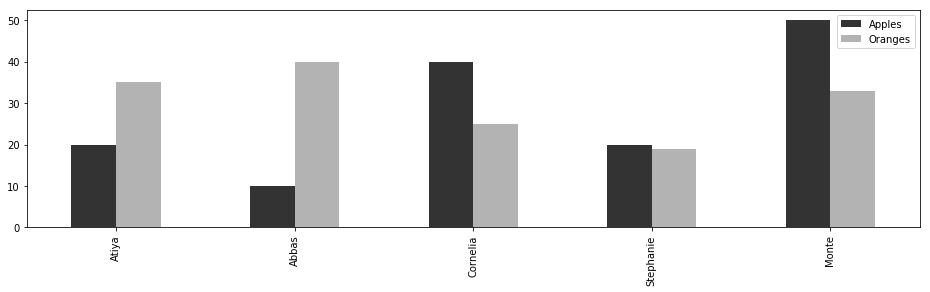

In [75]:
df.plot(kind='bar', color=color, figsize=(16,4))

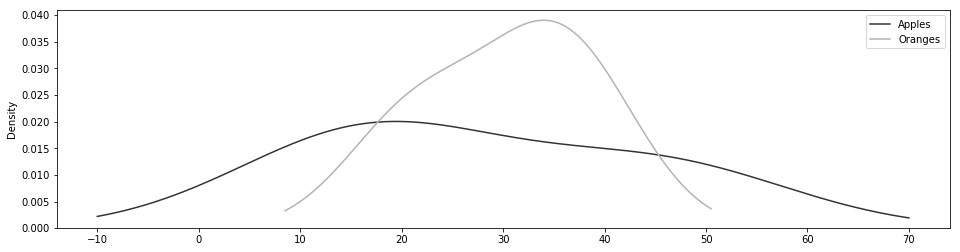

In [76]:
# A KDE plot ignores the index and uses the values of each column as the x axis
# and calculates a probability density for the y values
df.plot(kind='kde', color=color, figsize=(16,4))

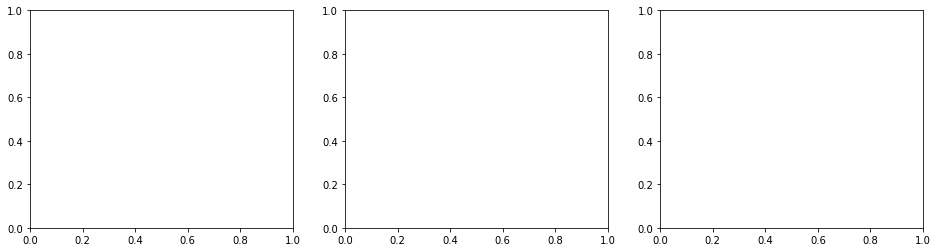

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

In [78]:
fig.suptitle('Two Variable Plots', size=20, y=1.02)

Text(0.5, 1.02, 'Two Variable Plots')

In [79]:
df.plot(kind='line', color=color, ax=ax1, title='Line plot')

In [80]:
df.plot(x='Apples', y='Oranges', kind='scatter', color=color,
 ax=ax2, title='Scatterplot')

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 5, 'y' with size 5.

In [81]:
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

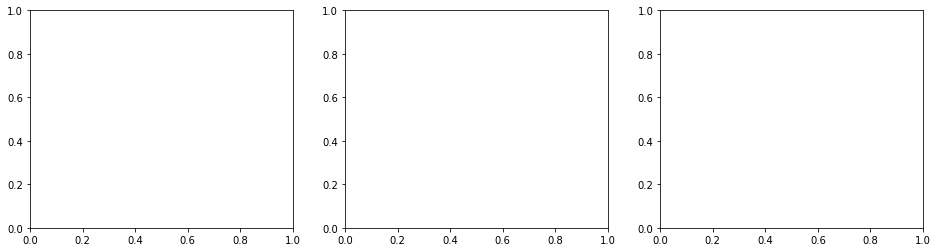

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

In [83]:
fig.suptitle('One Variable Plots', size=20, y=1.02)

Text(0.5, 1.02, 'One Variable Plots')

In [85]:
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')

In [86]:
df.plot(kind='box', ax=ax2, title='Boxplot')

In [87]:
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

## Visualizing the flights dataset

In [88]:
# Read in the flights dataset, and output the first five rows
flights = pd.read_csv('data/flights.csv')

In [89]:
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [90]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)

In [91]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']

In [92]:
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

In [93]:
cols.append('ON_TIME')

In [94]:
status = flights[cols].sum()

In [95]:
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

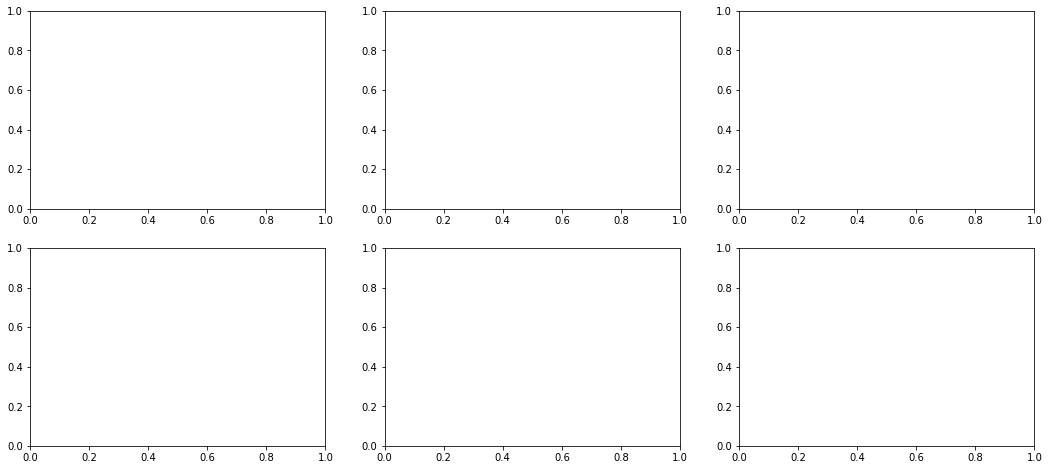

In [96]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))

In [97]:
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array

In [98]:
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

Text(0.5, 0.98, '2015 US Flights - Univariate Summary')

In [99]:
ac = flights['AIRLINE'].value_counts()

In [100]:
ac.plot(kind='barh', ax=ax1, title='Airline')

In [101]:
oc = flights['ORG_AIR'].value_counts()

In [102]:
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

In [103]:
dc = flights['DEST_AIR'].value_counts().head(10)

In [104]:
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

In [106]:
status.plot(kind='bar', ax=ax4, rot=0,
 log=True, title='Flight Status')

In [110]:
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),title='Distance KDE')

In [111]:
flights['ARR_DELAY'].plot(kind='hist', ax=ax6,
 title='Arrival Delay',
 range=(0,200))

In [113]:
hour = flights['SCHED_DEP'] // 100

In [114]:
minute = flights['SCHED_DEP'] % 100

In [115]:
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)

In [116]:
df_date.head()

,MONTH,DAY,HOUR,MINUTE,YEAR
0,1,1,16,25,2015
1,1,1,8,23,2015
2,1,1,13,5,2015
3,1,1,15,55,2015
4,1,1,17,20,2015


In [117]:
flight_dep = pd.to_datetime(df_date)

In [118]:
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

In [119]:
flights.index = flight_dep

In [120]:
fc = flights.resample('W').size()

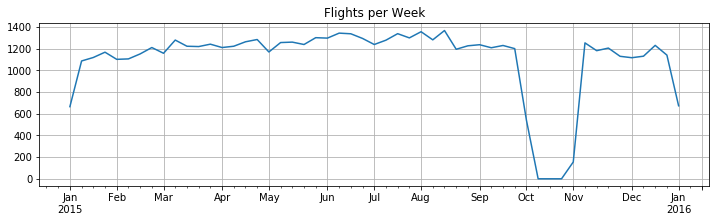

In [121]:
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

In [122]:
fc_miss = fc.where(fc > 1000)

In [123]:
fc_intp = fc_miss.interpolate(limit_direction='both')

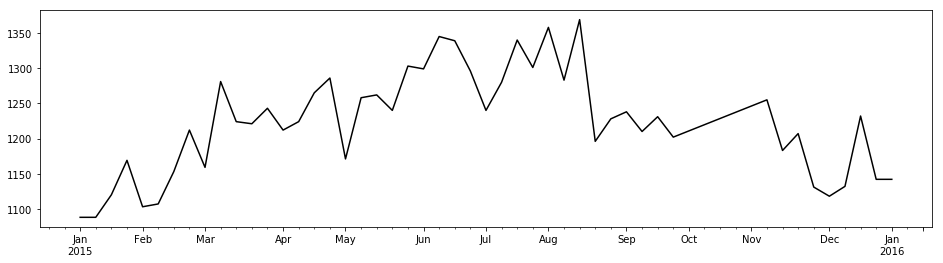

In [124]:
ax = fc_intp.plot(color='black', figsize=(16,4))

In [125]:
fc_intp[fc < 500].plot(linewidth=10, grid=True,
 color='.8', ax=ax)

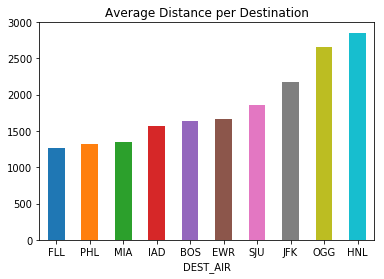

In [128]:
flights.groupby('DEST_AIR')['DIST'] \
 .agg(['mean', 'count']) \
 .query('count > 100') \
 .sort_values('mean') \
 .tail(10) \
 .plot(kind='bar', y='mean', rot=0, legend=False,
 title='Average Distance per Destination')

In [129]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']] \
 .query('DIST <= 2000').dropna()

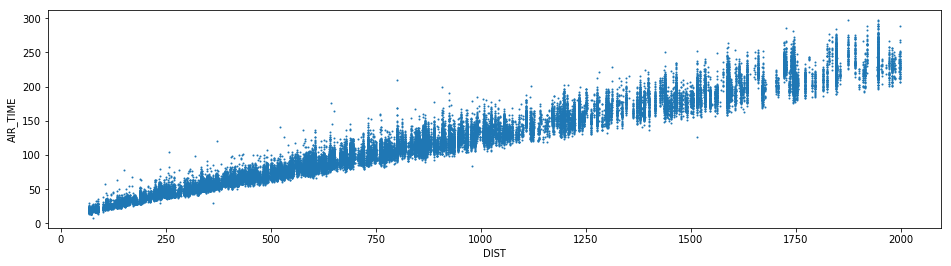

In [130]:
fs.plot(x='DIST', y='AIR_TIME', kind='scatter',
 s=1, figsize=(16,4))

In [131]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))

In [132]:
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [133]:
normalize = lambda x: (x - x.mean()) / x.std()

In [134]:
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] .transform(normalize)

In [135]:
fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


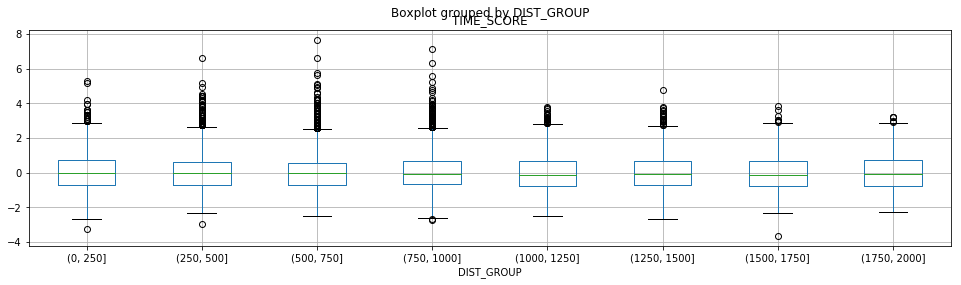

In [136]:
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE',
 figsize=(16,4))

In [137]:
ax.set_title('Z-Scores for Distance Groups')

Text(0.5, 1.0, 'Z-Scores for Distance Groups')

In [138]:
ax.figure.suptitle('')

Text(0.5, 0.98, '')

In [139]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]

In [140]:
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR',
'AIR_TIME',
 'DIST', 'ARR_DELAY', 'DIVERTED']]

In [141]:
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)

In [142]:
outliers

,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,121.0,373,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,199.0,907,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,176.0,643,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,164.0,651,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,210.0,802,98.0,0,5


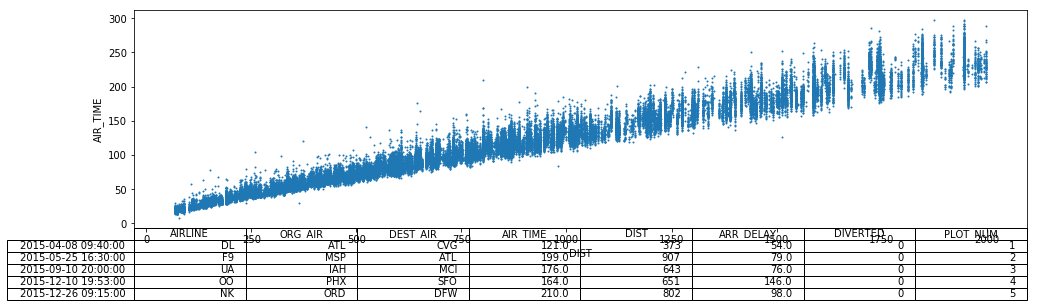

In [143]:
ax = fs.plot(x='DIST', y='AIR_TIME',
 kind='scatter', s=1,
 figsize=(16,4), table=outliers)

## Stacking area charts to discover emerging trends

In [144]:
meetup = pd.read_csv('data/meetup_groups.csv',
 parse_dates=['join_date'],
 index_col='join_date')

In [145]:
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [146]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']) \
 .size()

In [147]:
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [148]:
gc2 = group_count.unstack('group', fill_value=0)

In [149]:
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


In [150]:
group_total = gc2.cumsum()

In [151]:
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


In [152]:
row_total = group_total.sum(axis='columns')

In [153]:
group_cum_pct = group_total.div(row_total, axis='index')

In [154]:
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


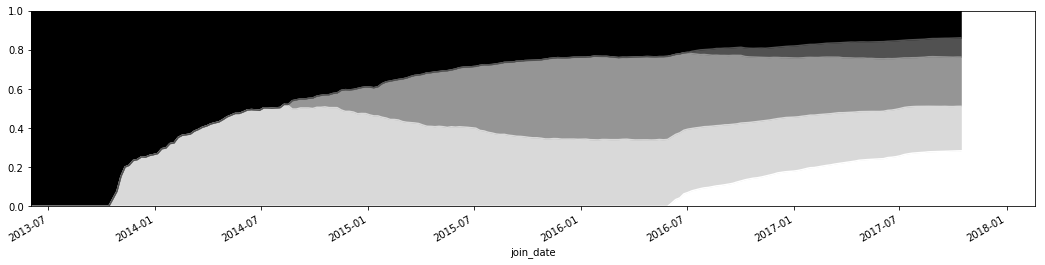

In [155]:
ax = group_cum_pct.plot(kind='area', figsize=(18,4),
 cmap='Greys', xlim=('2013-6', None),
 ylim=(0, 1), legend=False)


## Understanding the differences between seaborn and pandas

In [156]:
employee = pd.read_csv('data/employee.csv',
 parse_dates=['HIRE_DATE', 'JOB_DATE'])

In [157]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [11]:
import seaborn as sns

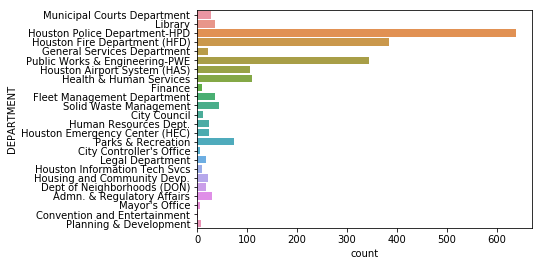

In [159]:
sns.countplot(y='DEPARTMENT', data=employee)

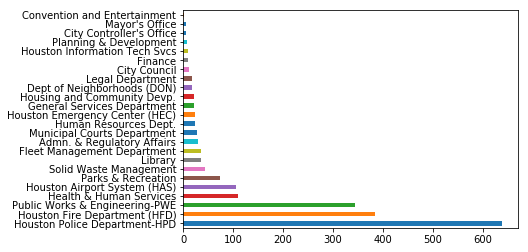

In [160]:
employee['DEPARTMENT'].value_counts().plot('barh')

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


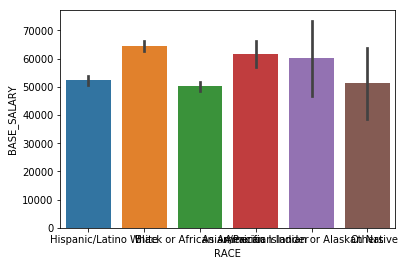

In [161]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)

In [162]:
ax.figure.set_size_inches(16, 4)

In [163]:
avg_sal = employee.groupby('RACE', sort=False) \
 ['BASE_SALARY'].mean()

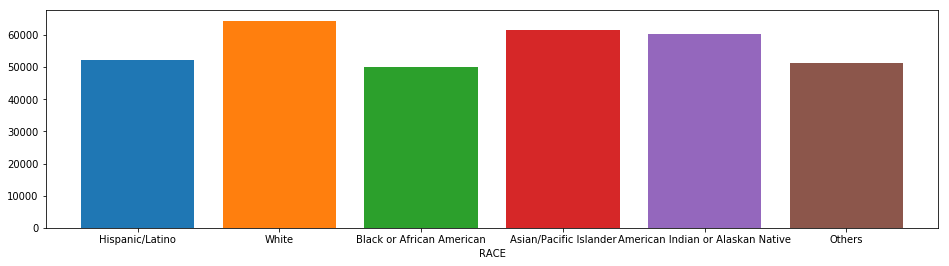

In [164]:
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)

In [165]:
ax.set_xlim(-.5, 5.5)

(-0.5, 5.5)

In [166]:
ax.set_ylabel('Mean Salary')

Text(3.200000000000017, 0.5, 'Mean Salary')

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


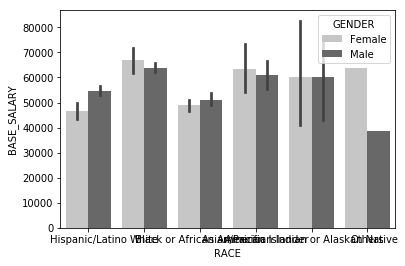

In [167]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
 data=employee, palette='Greys')

In [168]:
ax.figure.set_size_inches(16,4)

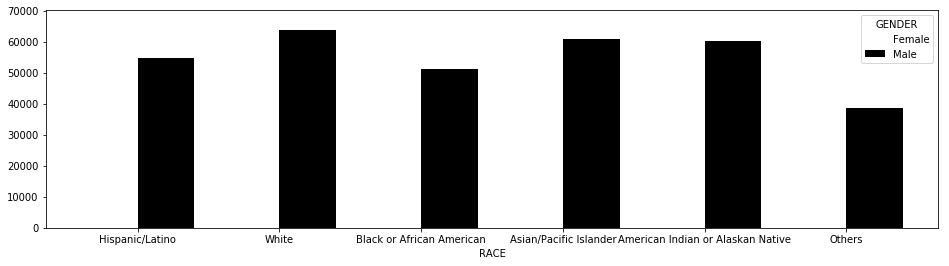

In [169]:
employee.groupby(['RACE', 'GENDER'], sort=False) \
 ['BASE_SALARY'].mean().unstack('GENDER') \
 .plot(kind='bar', figsize=(16,4), rot=0,
 width=.8, cmap='Greys')

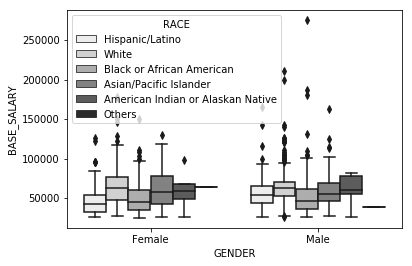

In [170]:
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee,
 hue='RACE', palette='Greys')

In [171]:
ax.figure.set_size_inches(14,4)

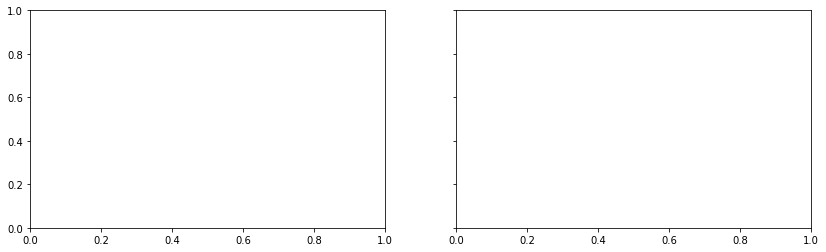

In [172]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)

In [173]:
for g, ax in zip(['Female', 'Male'], ax_array):
 employee.query('GENDER== @g') \
 .boxplot(by='RACE', column='BASE_SALARY',
 ax=ax, rot=20)
 ax.set_title(g + ' Salary')
 ax.set_xlabel('')


In [174]:
fig.suptitle('')

Text(0.5, 0.98, '')

## Doing multivariate analysis with seaborn Grids

In [5]:
employee = pd.read_csv('data/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])

In [6]:
days_hired = pd.to_datetime('12-1-2016') - employee['HIRE_DATE']

In [7]:
one_year = pd.Timedelta(1, unit='Y')

In [8]:
employee['YEARS_EXPERIENCE'] = days_hired / one_year

In [9]:
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472494
1,2000-07-19,16.369946
2,2015-02-03,1.826184
3,1982-02-08,34.812488
4,1989-06-19,27.452994


C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


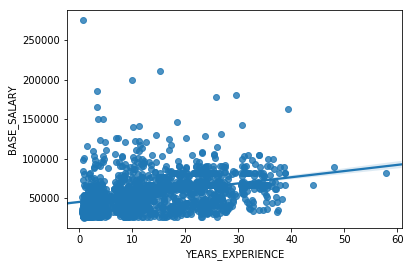

In [12]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=employee)

In [13]:
ax.figure.set_size_inches(14,4)

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


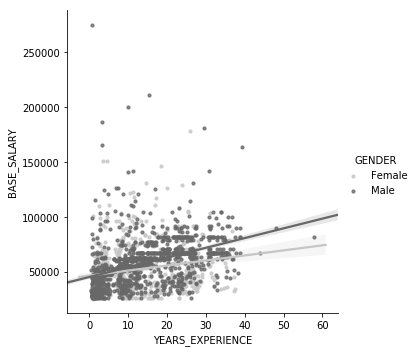

In [14]:
g = sns.lmplot('YEARS_EXPERIENCE', 'BASE_SALARY',
 hue='GENDER', palette='Greys',
 scatter_kws={'s':10}, data=employee)

In [15]:
g.fig.set_size_inches(14, 4)

In [17]:
type(g)
sns.axisgrid.FacetGrid

seaborn.axisgrid.FacetGrid

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


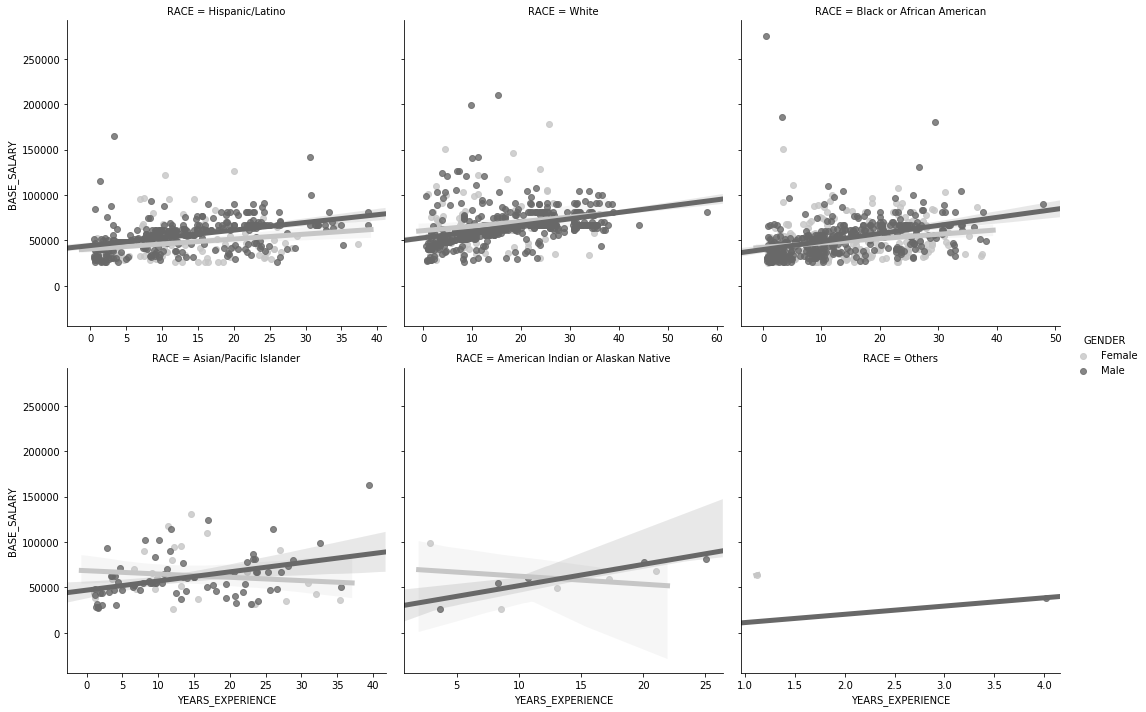

In [19]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
 hue='GENDER', col='RACE', col_wrap=3,
 palette='Greys', sharex=False,
 line_kws = {'linewidth':5},
 data=employee)

In [20]:
grid.set(ylim=(20000, 120000))

## Uncovering Simpson's paradox in the diamonds dataset with seaborn

In [21]:
diamonds = pd.read_csv('data/diamonds.csv')

In [22]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [28]:
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [25]:
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
 'VS1', 'VVS2', 'VVS1', 'IF']

In [26]:
diamonds['cut'] = pd.Categorical(diamonds['cut'],
 categories=cut_cats,
 ordered=True)

In [29]:
diamonds['color'] = pd.Categorical(diamonds['color'],
 categories=color_cats,
 ordered=True)

In [30]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
 categories=clarity_cats,
 ordered=True)

In [31]:
import seaborn as sns

In [33]:
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [34]:
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [35]:
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [36]:
fig.suptitle('Price Decreasing with Increasing Quality?')

Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

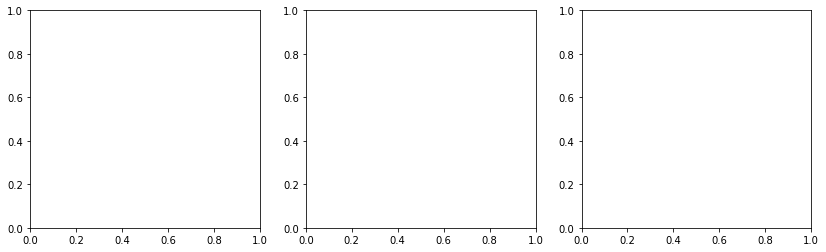

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


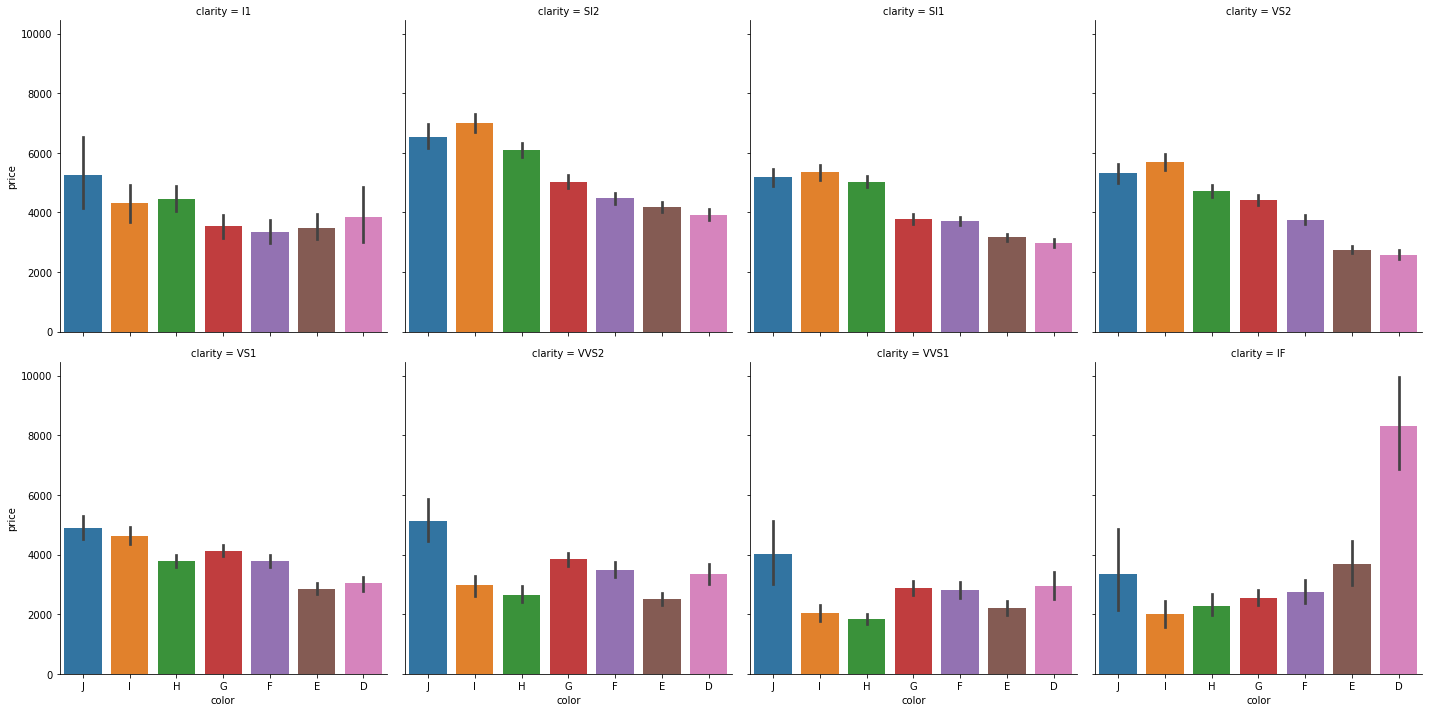

In [38]:
sns.factorplot(x='color', y='price', col='clarity',
 col_wrap=4, data=diamonds, kind='bar')

In [39]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

In [40]:
from matplotlib.cm import Greys

In [41]:
greys = Greys(np.arange(50,250,40))

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


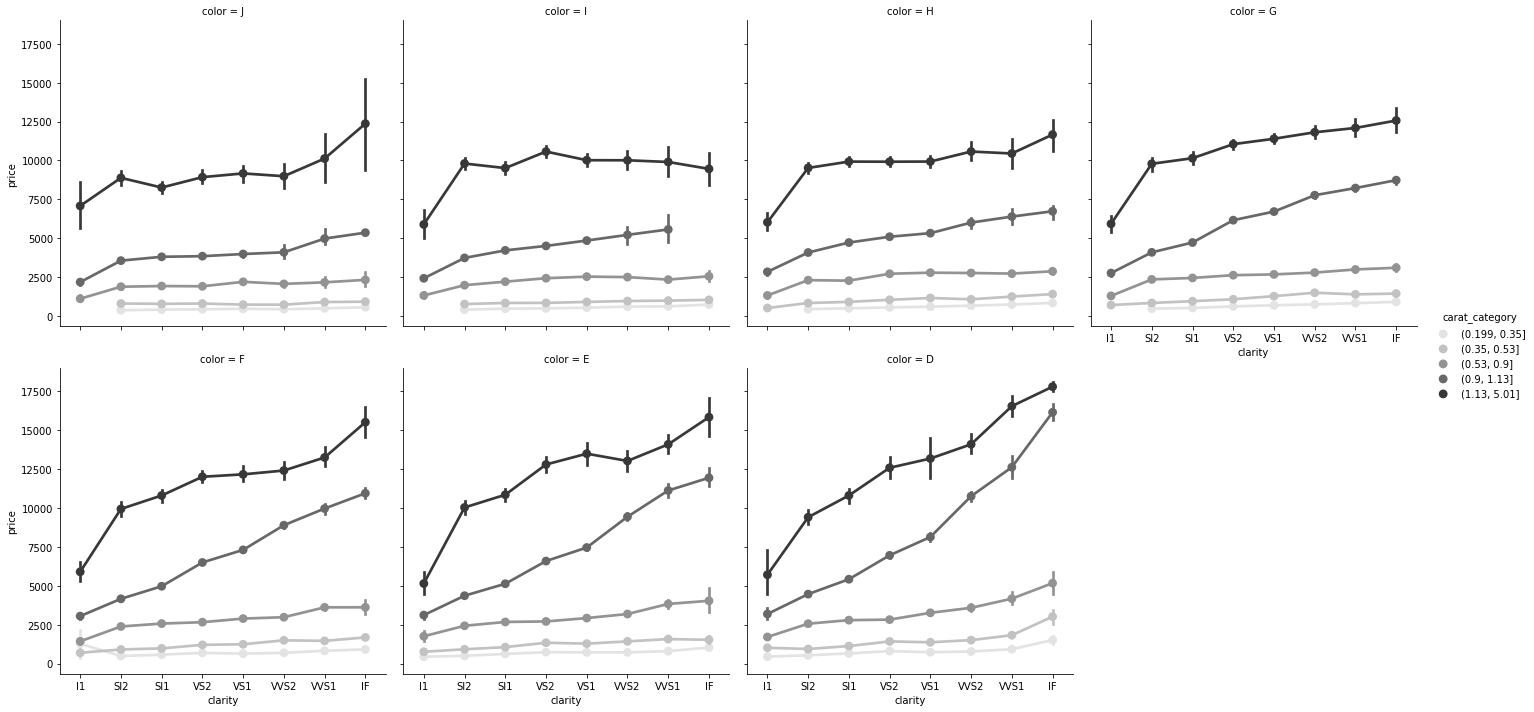

In [42]:
g = sns.factorplot(x='clarity', y='price', data=diamonds,
 hue='carat_category', col='color',
 col_wrap=4, kind='point', palette=greys)

In [43]:
g.fig.suptitle('Diamond price by size, color and clarity',
 y=1.02, size=20)

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

C:\Users\user\Anaconda3\envs\deliverable1\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


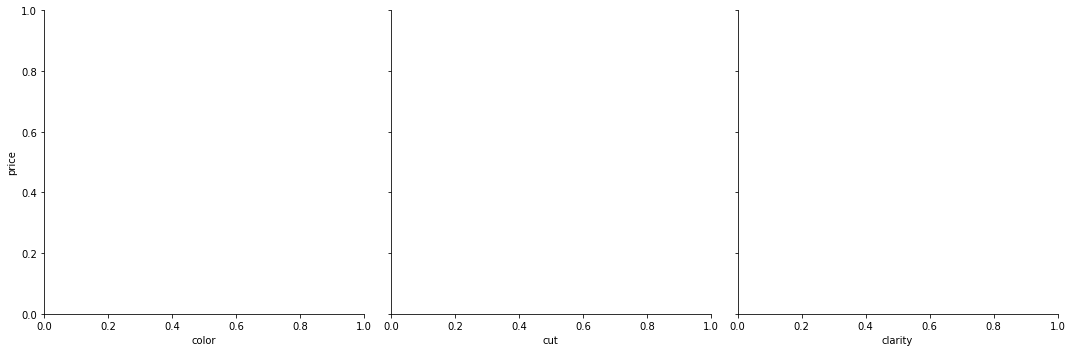

In [44]:
g = sns.PairGrid(diamonds,size=5,
 x_vars=["color", "cut", "clarity"],
 y_vars=["price"])